# **Lab 2 - Data Cleaning**

In [137]:
import pandas as pd
import numpy as np
'D:\desktop\heart.csv'
file = 'D:\desktop\Iris-Unclean.csv'
table = pd.read_csv(file)

In [138]:
table.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,0.0,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [139]:
len(table)

152

**use describe() to learn about the distribution of each feature & comment on any unordinary results**

In [140]:
## your code here
table.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,149.000000,150.000000,149.000000,151.000000
mean,75.756579,6.534228,3.336000,4.044966,1.156954
std,43.845303,7.587523,4.031275,4.814413,0.776102
min,1.000000,0.000000,-5.000000,0.000000,0.000000
25%,38.750000,5.000000,2.700000,1.500000,0.200000
50%,75.500000,5.800000,3.000000,4.300000,1.300000
75%,113.250000,6.400000,3.300000,5.100000,1.800000
max,150.000000,72.000000,32.000000,58.000000,2.500000


In [141]:
import matplotlib.pyplot as plt
import matplotlib.pyplot

**use scatter plot to plot the values of each feature**

In [142]:
def features_scatterPlot(df, c = False):
    plt.gcf();
    plt.figure(figsize=(6, 4));
    listo = ['SepalLengthColor', 'SepalWidthColor', 'PetalLengthColor', 'PetalWidthColor']
    for i, j in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
        fig = plt.subplots_adjust(hspace = 200, wspace= 200);
        if c:
            if 0 in df[j]:
                if 'SepalLengthColor' in df:
                    carry = df[['Id', j,listo[i] ]].dropna()
                    colors = carry[listo[i]].to_list()
                    plt.scatter(x=carry['Id'], y = carry[j] ,color=colors);
                    plt.show();
            else:
                carry = df[['Id', j]].dropna()
                #carry = np.array(carry).reshape(len(carry), 2)
                #carryvalues = carry[np.all(carry > 0 , axis=1)]
                #carryzeros = carry[~np.all(carry > 0  , axis=1)]
                #plt.scatter(carryvalues[:,0],carryvalues[:,1] ,c='r')
                #plt.scatter(carryzeros[:,0], carryzeros[:,1] ,c='DarkBlue');
                #plt.show();
                carryval = carry[carry > 0]
                carryzero = carry[carry == 0]
                plt.scatter(x=carryval['Id'], y = carryzero[j] ,c='r');
                plt.scatter(x=carryval['Id'], y = carryval[j] ,c='b');
                plt.show();
        else:
            # else, just plot all the values with the same color
            fig = df.plot.scatter(x='Id', y = j ,c='b');

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

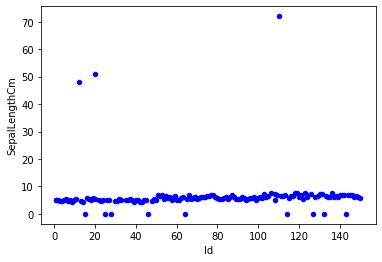

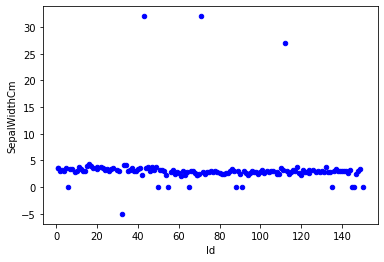

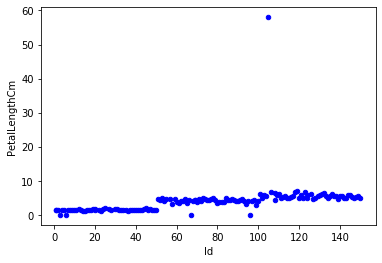

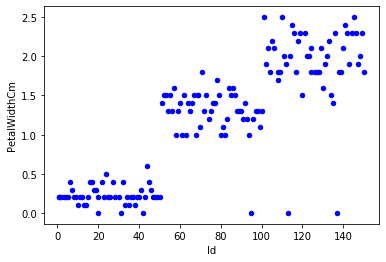

In [143]:
features_scatterPlot(table)

**use isna() and compute the number of the null values in each feature**

In [144]:
print("*****the number of nulls in the dataset*****")
## your code here
result = table.isna().sum()
result


*****the number of nulls in the dataset*****


Id               0
SepalLengthCm    3
SepalWidthCm     2
PetalLengthCm    3
PetalWidthCm     1
Species          8
dtype: int64

**Delete the Id column**

In [145]:
## your code here
df = table.drop('Id',axis = 1)


**Find out the percentage of missing values, rounded to 2 decimal places**


In [146]:
## your code here
print("Percentage", round((df.isna().sum().sum()/df.size)*100,2), "%")

Percentage 2.24 %


**1- Extract the names of different types of Iris species**

**2- Create a new dataframe containing only valid species (Valid species format: Iris-"name")**


In [147]:
## your code here

#table['Species'].unique()
table.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,0.0,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,0.0,0.0,0.4,Irisssssss
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


In [148]:
## your code here
df = table[['Species']].dropna()
dff = df[df.Species.str.startswith('Iris-')]
table[['Species']] = dff[['Species']]
table = table.dropna()
table

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,0.0,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,146,6.7,0.0,5.2,2.3,Iris-virginica
147,147,6.3,2.5,5.0,1.9,Iris-virginica
148,148,6.5,3.0,5.2,2.0,Iris-virginica
149,149,6.2,3.4,5.4,2.3,Iris-virginica


**replace the negative values with zeros**

In [149]:
## your code here
#table[table < 0] = 0 #we can't use it because data is not all numeric
df = table._get_numeric_data()
df[df < 0] = 0



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

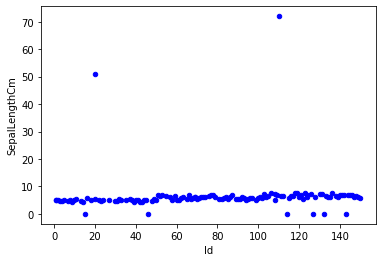

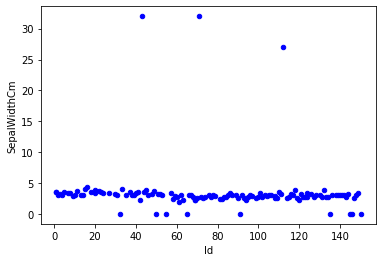

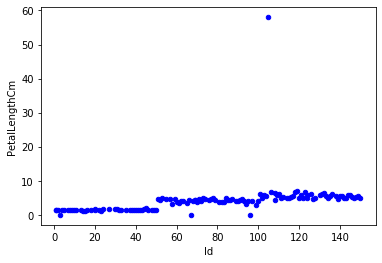

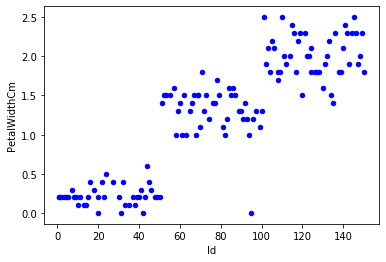

In [150]:
features_scatterPlot(table)

In [151]:
table.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,78.022901,6.441221,3.445802,4.187786,1.230534
std,43.621883,7.158125,4.238019,5.078083,0.772597
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,5.050000,2.700000,1.500000,0.300000
50%,79.000000,5.800000,3.000000,4.500000,1.400000
75%,115.500000,6.500000,3.250000,5.100000,1.800000
max,150.000000,72.000000,32.000000,58.000000,2.500000


**create 4 new columns, [SepalLengthColor, SepalWidthColor, PetalLengthColor, PetalWidthColor], each with value 'r' if the feature value is zero and 'b' otherwise**

In [152]:
## your code here
table['SepalLengthColor'] = table.SepalLengthCm.map(lambda x: 'r' if x ==0 else 'b' )
table['SepalWidthColor'] = table.SepalWidthCm.map(lambda x: 'r' if x ==0 else 'b' )
table['PetalLengthColor'] = table.PetalLengthCm.map(lambda x: 'r' if x ==0 else 'b' )
table['PetalWidthColor'] = table.PetalWidthCm.map(lambda x: 'r' if x ==0 else 'b' )


In [153]:
table.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b


<Figure size 432x288 with 0 Axes>

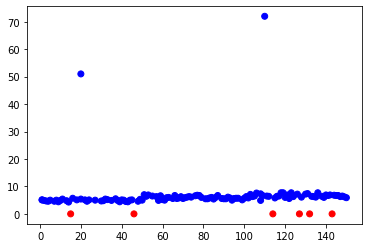

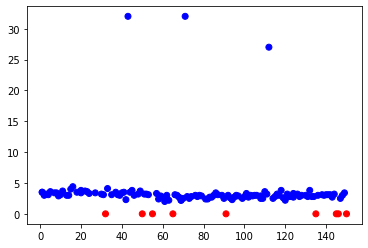

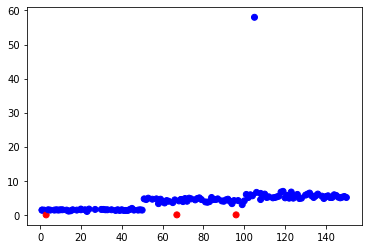

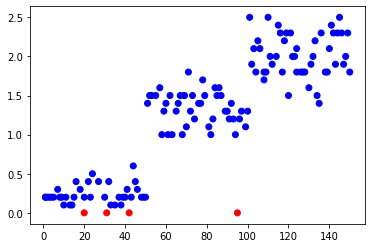

In [154]:
features_scatterPlot(table, True)

**Replace all zeros with numpy's NaN**

In [155]:
## your code here
df = table._get_numeric_data()
df[df == 0] = np.nan
table
#table.dropna(subset=['stop_date', 'stop_time'], inplace=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,3,4.7,3.2,NaN,0.2,Iris-setosa,b,b,r,b
4,4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...
146,146,6.7,NaN,5.2,2.3,Iris-virginica,b,r,b,b
147,147,6.3,2.5,5.0,1.9,Iris-virginica,b,b,b,b
148,148,6.5,3.0,5.2,2.0,Iris-virginica,b,b,b,b
149,149,6.2,3.4,5.4,2.3,Iris-virginica,b,b,b,b


In [156]:
1#np.nan in table.SepalWidthCm
col = table['SepalLengthColor'].to_list()
type(col[1])

str

<Figure size 432x288 with 0 Axes>

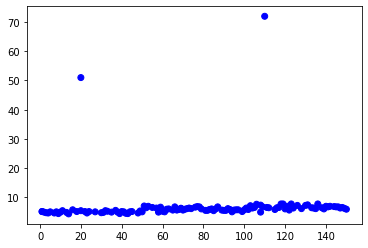

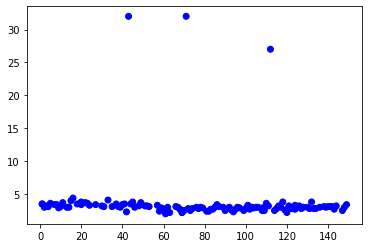

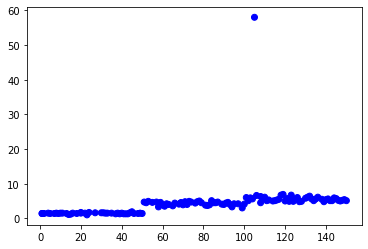

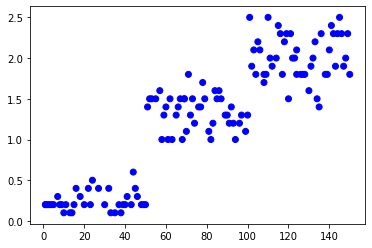

In [157]:
features_scatterPlot(table, True)

**Create two copies of the dataframe**



In [158]:
## your code here
dfc = table.copy()
dfc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,3,4.7,3.2,NaN,0.2,Iris-setosa,b,b,r,b
4,4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...
146,146,6.7,NaN,5.2,2.3,Iris-virginica,b,r,b,b
147,147,6.3,2.5,5.0,1.9,Iris-virginica,b,b,b,b
148,148,6.5,3.0,5.2,2.0,Iris-virginica,b,b,b,b
149,149,6.2,3.4,5.4,2.3,Iris-virginica,b,b,b,b


**First copy:  replace all the NaN values with the respective attribute's/column's mean**


In [159]:
means = dfc.mean().to_list()[1:]
#dfc.describe().mean(), means

In [160]:
## your code here
dfc.describe().mean()
dfc.SepalLengthCm.fillna(means[0], inplace = True)
dfc.SepalWidthCm.fillna(means[1], inplace = True)
dfc.PetalLengthCm.fillna(means[2], inplace = True)
dfc.PetalWidthCm.fillna(means[3], inplace = True)
dfc


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.400000,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.400000,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.400000,0.2,Iris-setosa,b,b,b,b
3,3,4.7,3.2,4.285938,0.2,Iris-setosa,b,b,r,b
4,4,4.6,3.1,1.500000,0.2,Iris-setosa,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...
146,146,6.7,3.7,5.200000,2.3,Iris-virginica,b,r,b,b
147,147,6.3,2.5,5.000000,1.9,Iris-virginica,b,b,b,b
148,148,6.5,3.0,5.200000,2.0,Iris-virginica,b,b,b,b
149,149,6.2,3.4,5.400000,2.3,Iris-virginica,b,b,b,b


<Figure size 432x288 with 0 Axes>

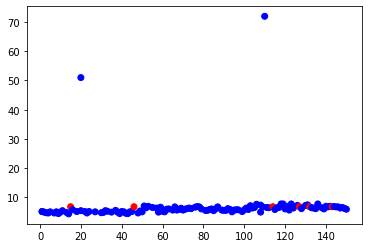

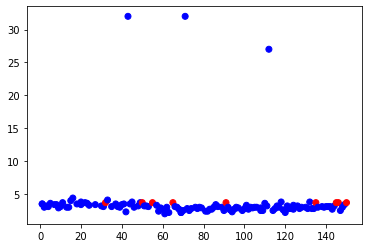

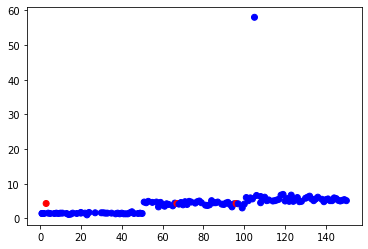

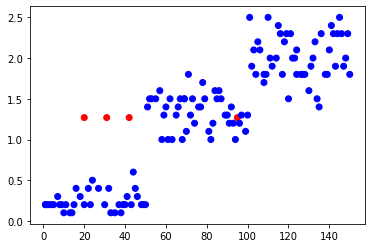

In [161]:
features_scatterPlot(dfc, True)


**Second copy: group each species and replace all the NaN values with the respective attribute's/column's mean related to its species**

In [162]:
## your code here
## group by species
dfcc = table.copy()
gr = dfcc.groupby(['Species'])
gr.head()





,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,3,4.7,3.2,NaN,0.2,Iris-setosa,b,b,r,b
4,4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,b,b,b,b
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,b,b,b,b
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,b,b,b,b
54,55,6.5,NaN,4.6,1.5,Iris-versicolor,b,r,b,b
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,b,b,b,b


**get each group as a separate data frame and make a list of the small dataframes**

*hint: use grouped_df.groups and grouped_df.get_group()*

In [163]:
## your code here
groupss = [gr.get_group(x) for x in gr.groups]
groupss[0]
len(groupss)

3

**loop over each feature in each group and replace the nans with the mean of that feature in this group**

In [164]:
## your code here
for i in range (len(groupss)):
    for j in range(5):
        groupss[i].iloc[:,j] = groupss[i].iloc[:,j].fillna(groupss[i].iloc[:,j].mean())

**concatenate all the groups together in a single dataframe**

In [165]:
groupss[0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa,b,b,b,b
1,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa,b,b,b,b
2,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa,b,b,b,b
3,3,4.700000,3.200000,1.446154,0.200000,Iris-setosa,b,b,r,b
4,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa,b,b,b,b
5,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa,b,b,b,b
7,7,4.600000,3.400000,1.400000,0.300000,Iris-setosa,b,b,b,b
8,8,5.000000,3.400000,1.500000,0.200000,Iris-setosa,b,b,b,b
9,9,4.400000,2.900000,1.400000,0.200000,Iris-setosa,b,b,b,b
10,10,4.900000,3.100000,1.500000,0.100000,Iris-setosa,b,b,b,b


In [166]:
'SepalLengthColor' in groupss[0]

True

In [167]:
## your code here
data = groupss[0]
for i in groupss[1:]:
    data = data.append(i)

data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,1,5.1,3.5,1.400000,0.2,Iris-setosa,b,b,b,b
1,1,5.1,3.5,1.400000,0.2,Iris-setosa,b,b,b,b
2,2,4.9,3.0,1.400000,0.2,Iris-setosa,b,b,b,b
3,3,4.7,3.2,1.446154,0.2,Iris-setosa,b,b,r,b
4,4,4.6,3.1,1.500000,0.2,Iris-setosa,b,b,b,b
5,5,5.0,3.6,1.400000,0.2,Iris-setosa,b,b,b,b
7,7,4.6,3.4,1.400000,0.3,Iris-setosa,b,b,b,b
8,8,5.0,3.4,1.500000,0.2,Iris-setosa,b,b,b,b
9,9,4.4,2.9,1.400000,0.2,Iris-setosa,b,b,b,b
10,10,4.9,3.1,1.500000,0.1,Iris-setosa,b,b,b,b


<Figure size 432x288 with 0 Axes>

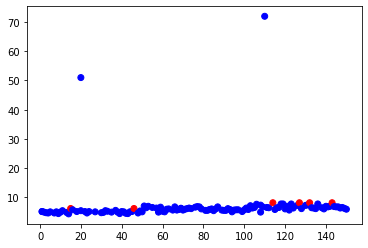

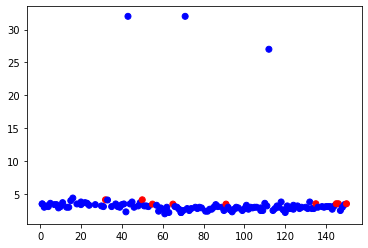

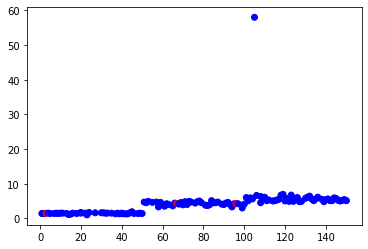

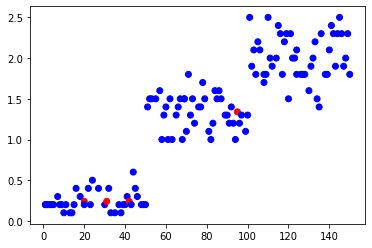

In [168]:
features_scatterPlot(data, True)